Name: Anton Paala <br>
Course & Section: CPE311 - CPE22S3 <br>
Instructor: Engr. Roman M. Richard

# Hands-on Activity 9.2 Customized Visualizations using Seaborn

**Procedures:**

- 9.4 Introduction to Seaborn 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
fb = pd.read_csv(
    'C:/Users/paala/CPE311 - Paala/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
quakes = pd.read_csv('C:/Users/paala/CPE311 - Paala/earthquakes.csv')

In [3]:
quakes.assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms') # Set the time column into datetime with millisecond unit.
).set_index('time').loc['2018-09-28'].query( # Set time column as index and locate the date 2018-09-28.
    "parsed_place == 'Indonesia' and tsunami == 1 and mag == 7.5"
)

,mag,magType,place,tsunami,parsed_place
time,,,,,
2018-09-28 10:02:43.480,7.5,mww,"78km N of Palu, Indonesia",1,Indonesia


<Axes: xlabel='magType', ylabel='mag'>

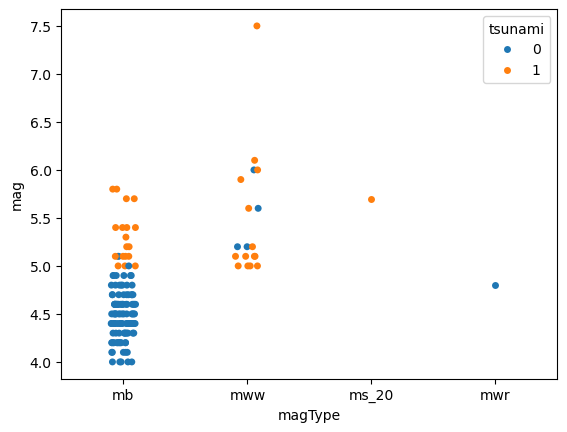

In [5]:
sns.stripplot(
    x='magType', # Stripplot visualizes both numerical and categorical data.
    y='mag',
    hue='tsunami', # Coloring the column of data using the hue parameter.
    data=quakes.query('parsed_place == "Indonesia"')
)

<Axes: xlabel='magType', ylabel='mag'>

X:\Users\paala\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 10.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


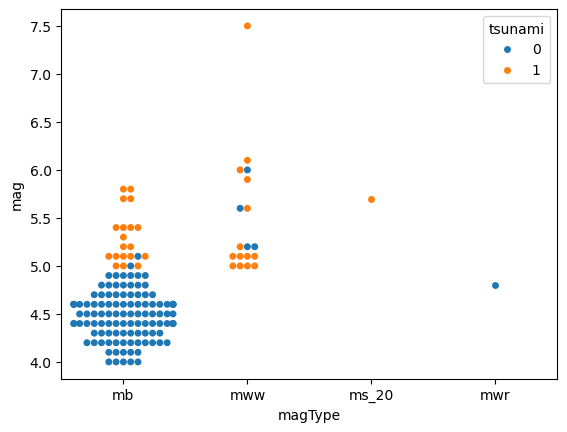

In [6]:
sns.swarmplot(
    x='magType',
    y='mag',
    hue='tsunami', # Bee swarm plot keeps the point from overlapping.
    data=quakes.query('parsed_place == "Indonesia"')
)

<Axes: >

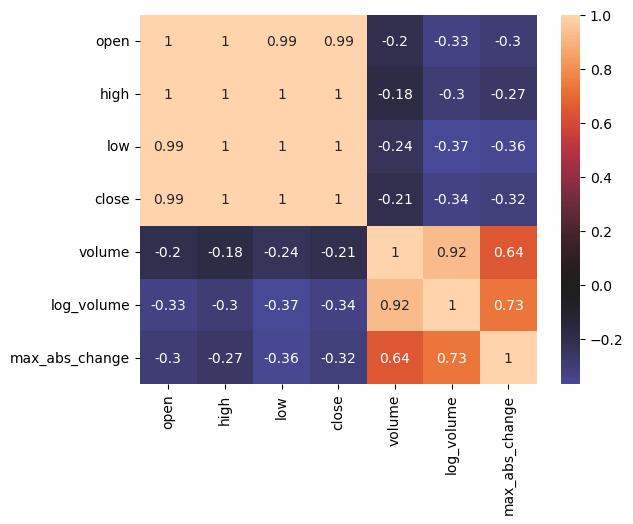

In [7]:
sns.heatmap(
    fb.sort_index().assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr(),  # Correlation matrix using heatmap
    annot=True, center=0
)

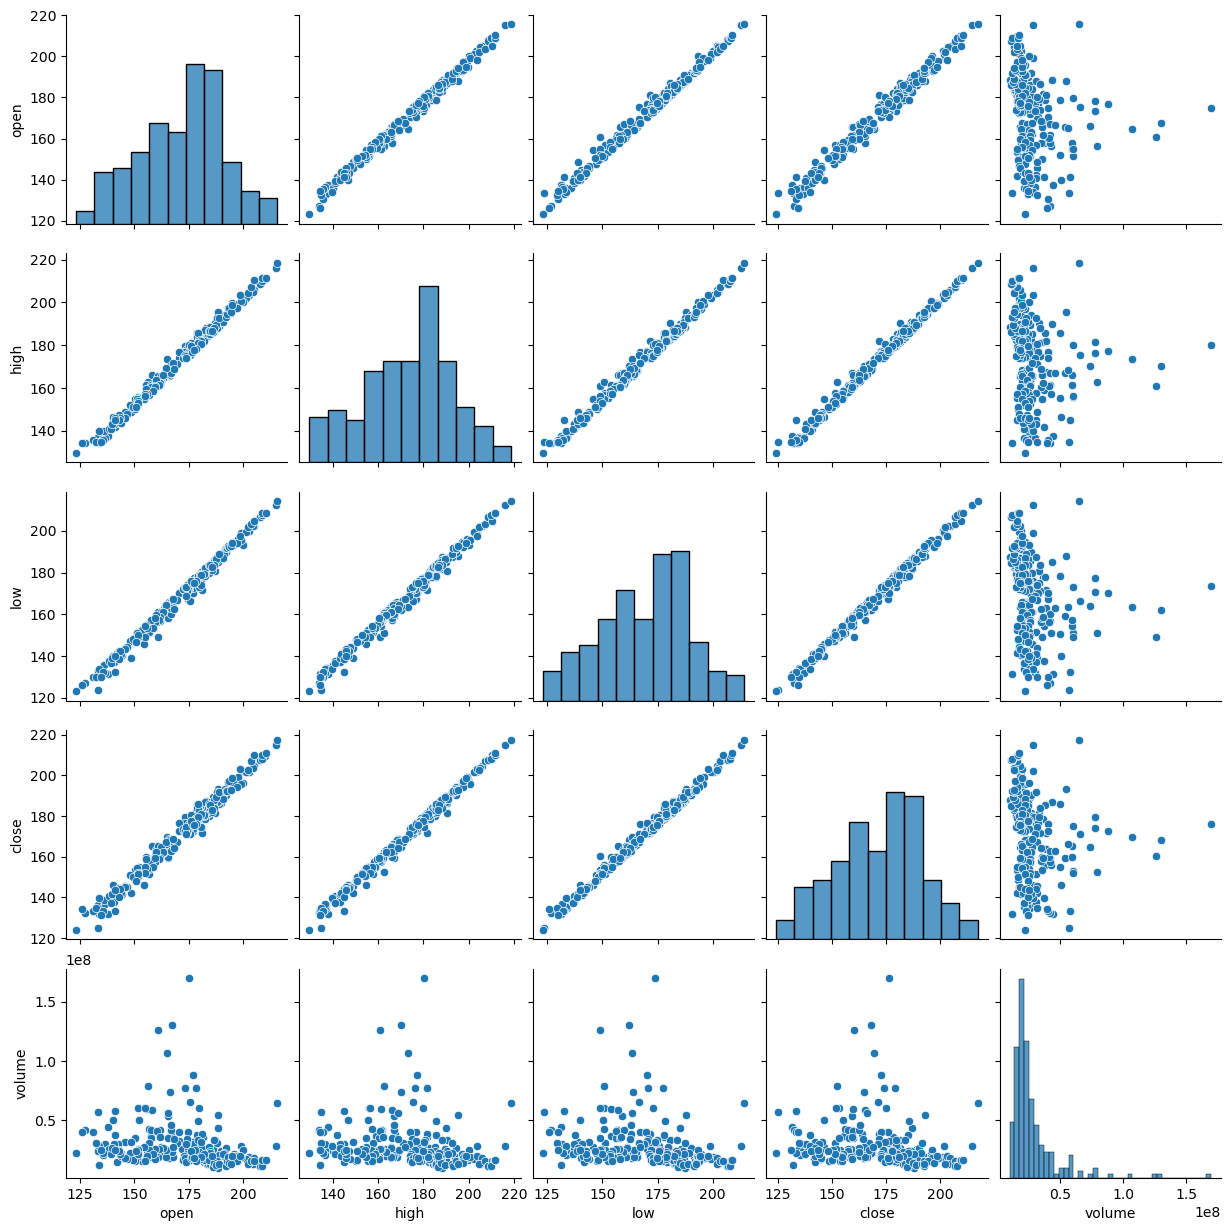

In [8]:
sns.pairplot(fb) # Scatter matrix 

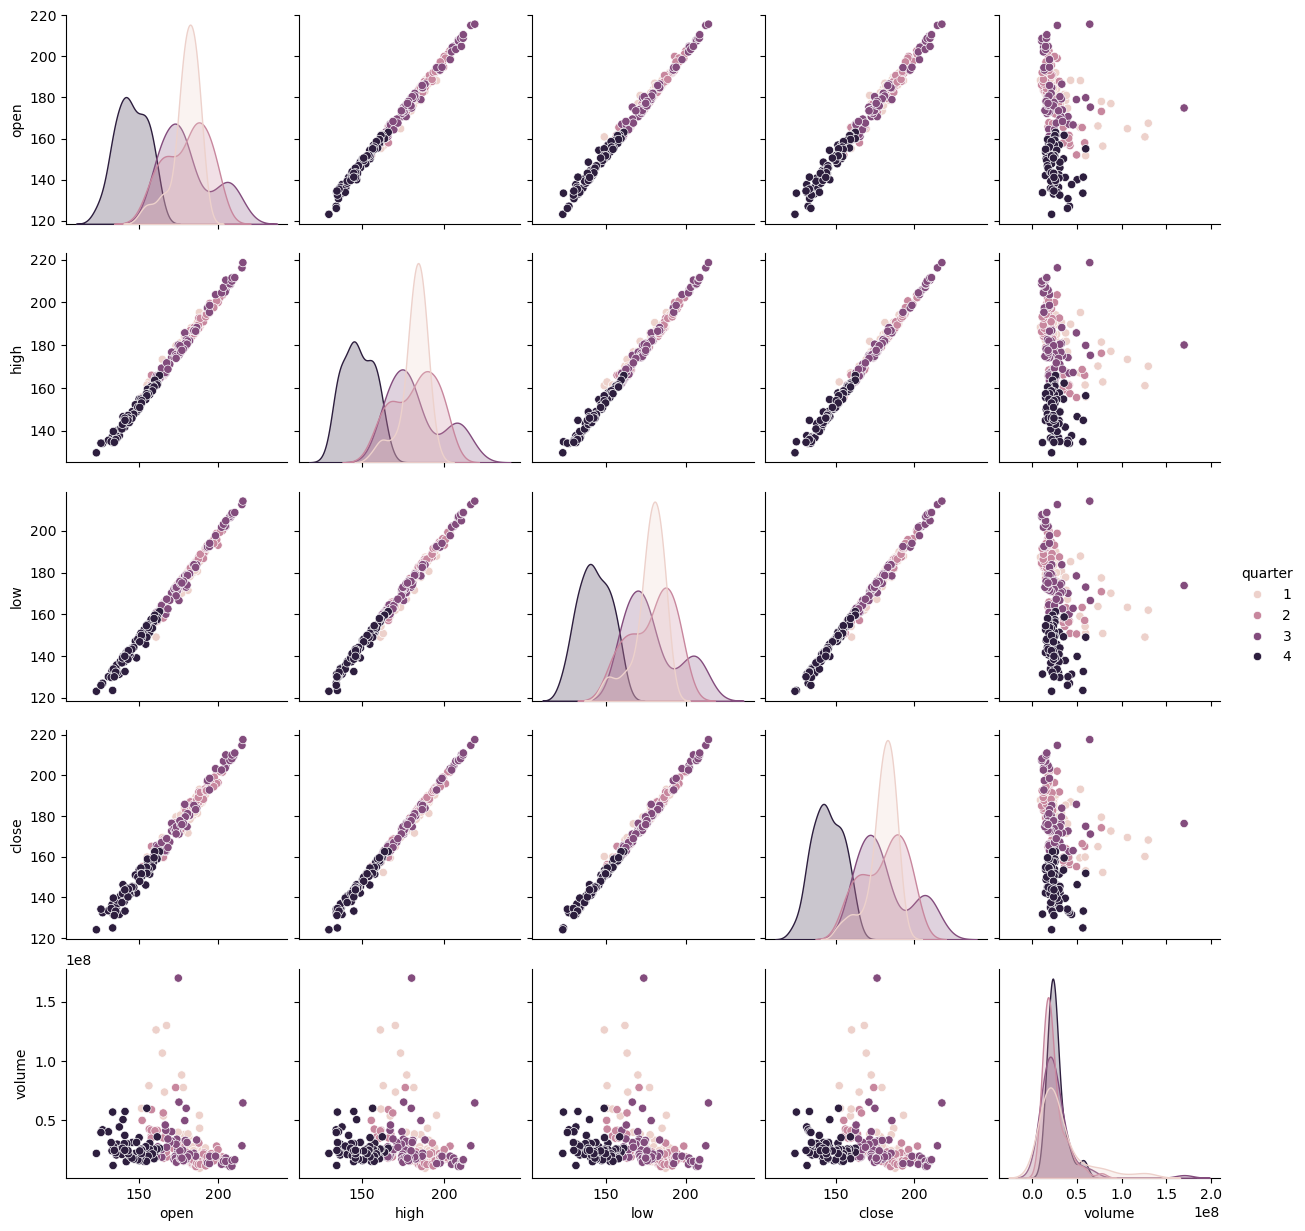

In [10]:
sns.pairplot(
    fb.assign(quarter=lambda x: x.index.quarter),
    diag_kind='kde', # We can use different method of plot. 
    hue='quarter' # Color the data based on another column
)

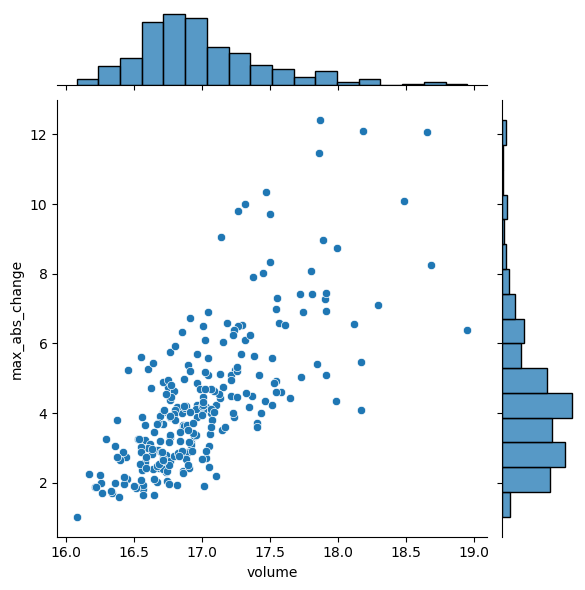

In [11]:
sns.jointplot( # Joint plot visualizes the relationship between two variables.
    x='volume', # At the same time, the plot can also visualize the distribution at the same time
    y='max_abs_change', 
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

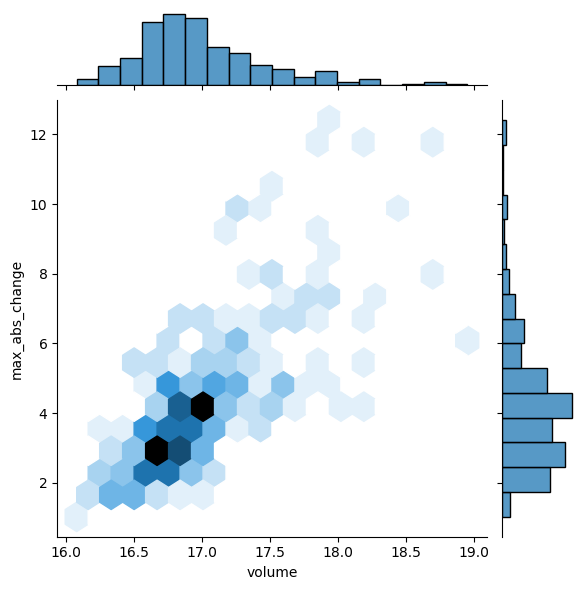

In [12]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='hex', # Changing the plot in the center by changing the 'kind' argument. 
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

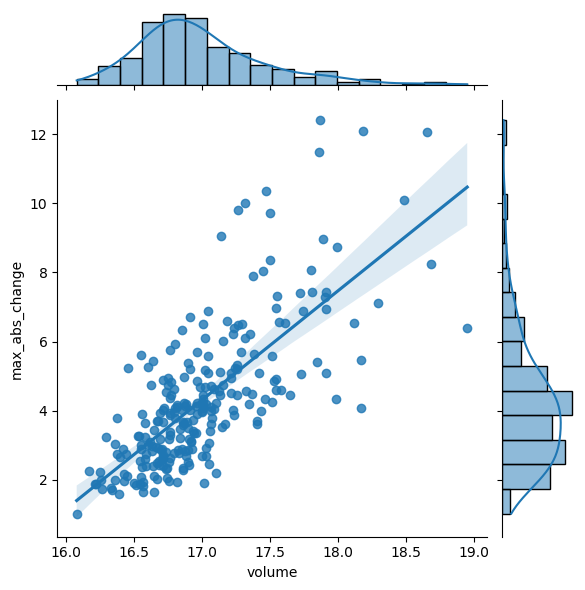

In [13]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='reg', # Passing 'reg' in the 'kind' argument shows a regression line in the center of the plot and KDE on its sides.
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

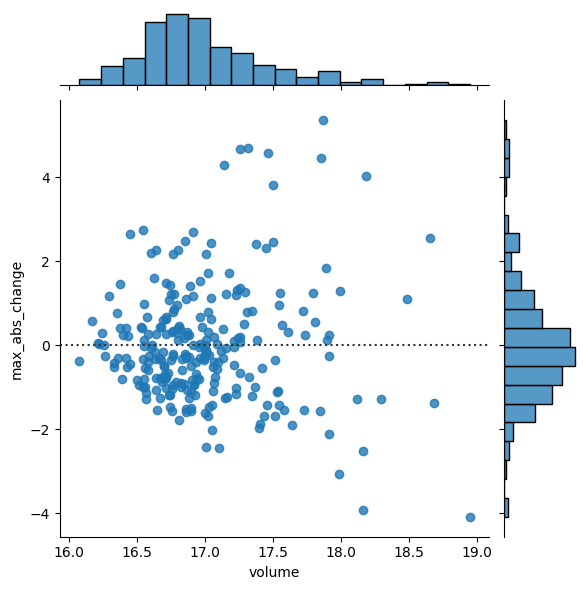

In [15]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='resid', # Residuals appear in the regression.
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

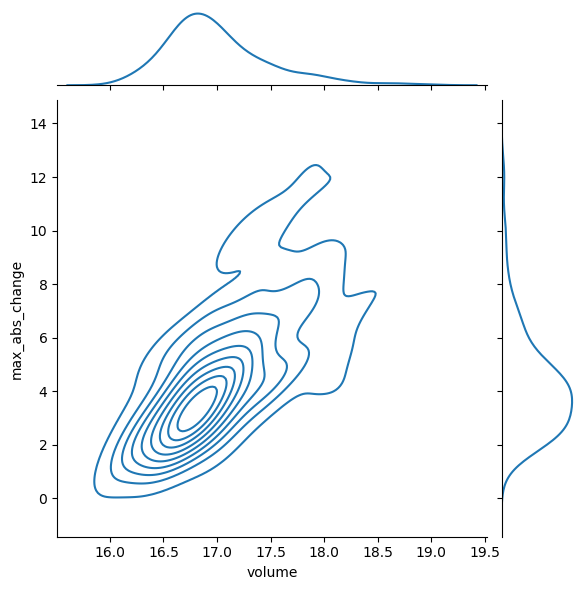

In [16]:
sns.jointplot(
    x='volume',
    y='max_abs_change',
    kind='kde', # Contour plot of the joint density, with KDEs along the sides.
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low
    )
)

In [17]:
fb_reg_data = fb.assign(
    volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).iloc[:,-2:] # Isolating the data by saving it into a variable before visualization

In [18]:
import itertools # Library that gives iterators.

In [19]:
iterator = itertools.repeat("I'm an iterator", 1) # An object that loops over
for i in iterator:
    print(f'-->{i}') # This is looped once because not all iterables are iterators. It should be passed in a list in order repeat
print('This printed once because the iterator has been exhausted')
for i in iterator:
    print(f'-->{i}')

-->I'm an iterator
This printed once because the iterator has been exhausted


In [21]:
iterable = list(itertools.repeat("I'm an iterable", 1)) # The function is passed onto a list, which is iterable.
for i in iterable:
    print(f'-->{i}')
    print('This prints again because it\'s an iterable:')
for i in iterable:
    print(f'-->{i}')

-->I'm an iterable
This prints again because it's an iterable:
-->I'm an iterable


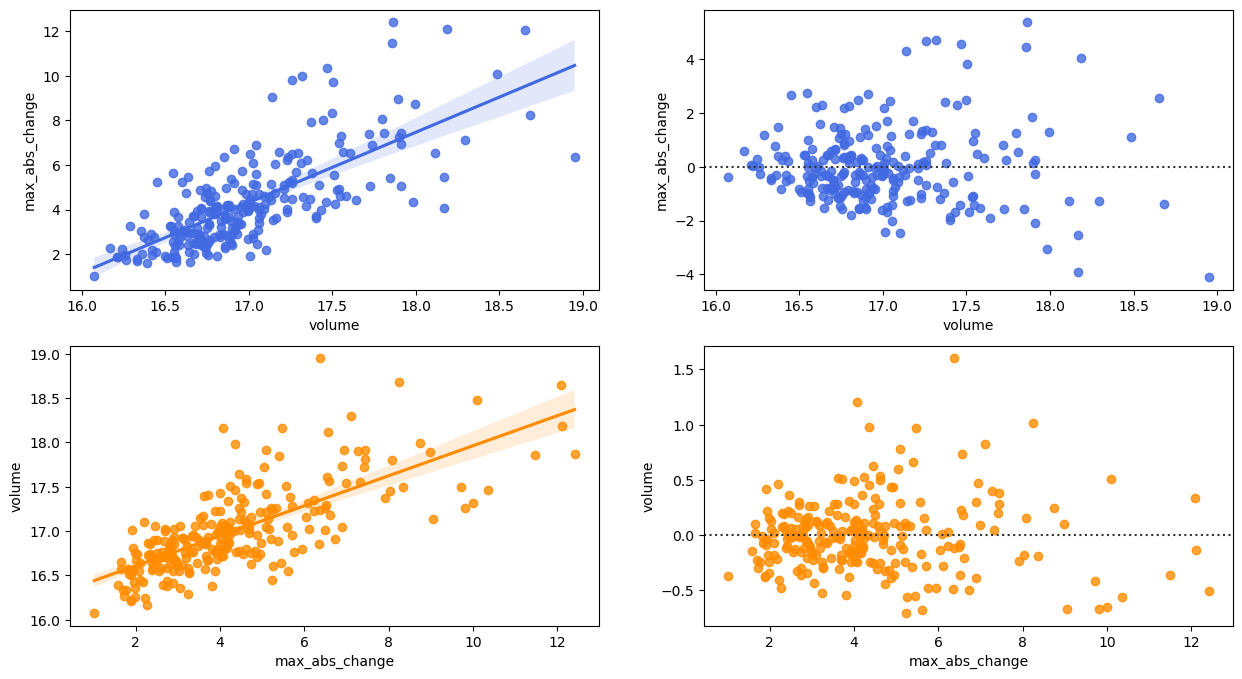

In [22]:
from reg_resid_plot import reg_resid_plots 
reg_resid_plots(fb_reg_data) # This function uses regplot() and residplot() with the combination of itertools
                            # to plot regression and residual side-by-side.

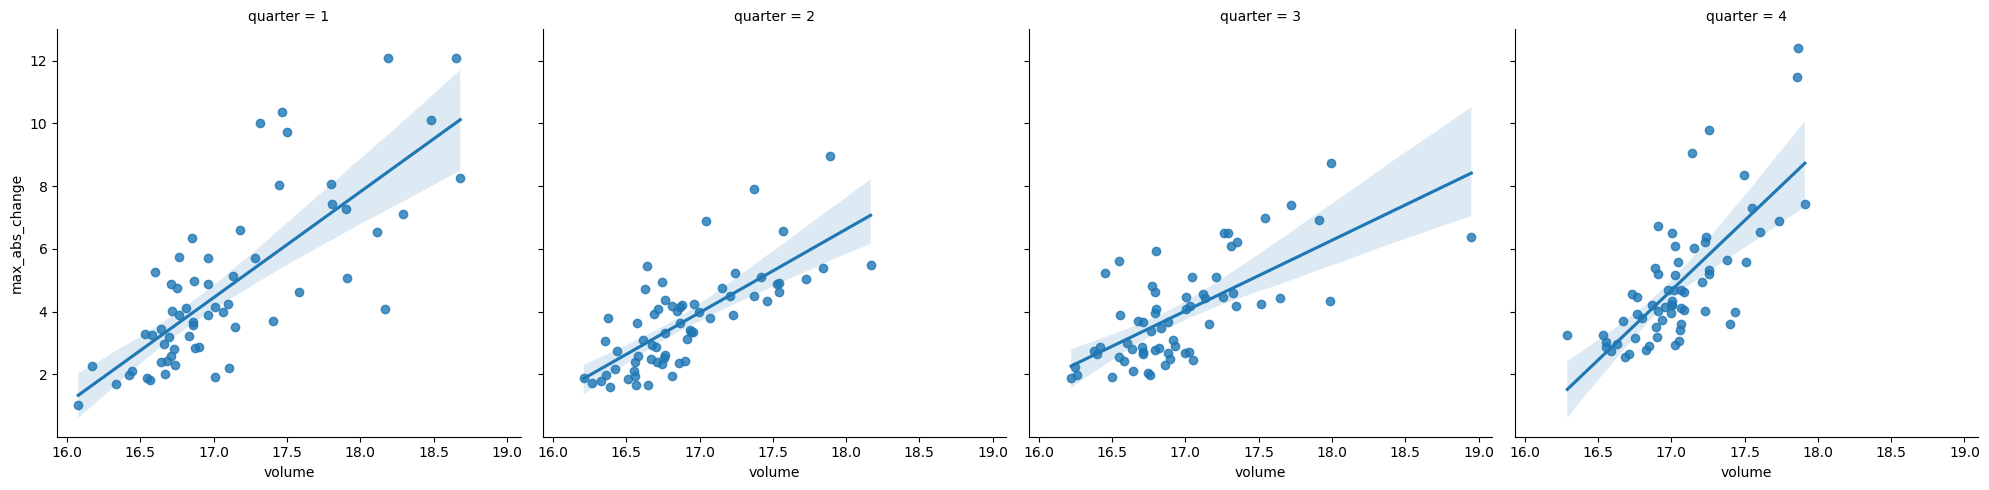

In [23]:
sns.lmplot( # Splits the regression across subsets of data.
    x='volume',
    y='max_abs_change',
    data=fb.assign(
        volume=np.log(fb.volume),
        max_abs_change=fb.high - fb.low,
        quarter=lambda x: x.index.quarter # Regression per quarter
    ),
    col='quarter' 
)

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

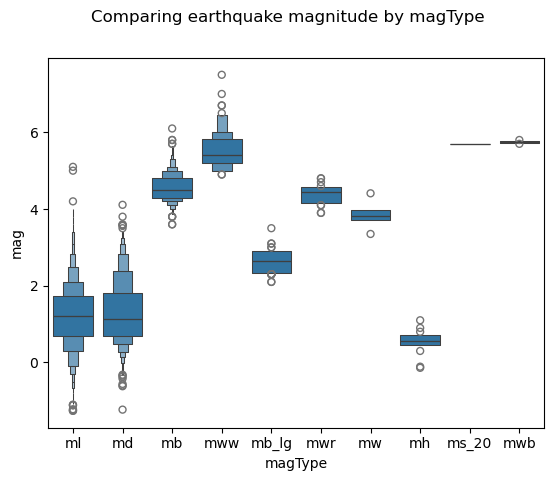

In [24]:
sns.boxenplot( # Box plot that shows quantiles
    x='magType', y='mag', data=quakes[['magType', 'mag']]
)
plt.suptitle('Comparing earthquake magnitude by magType')

Text(0.5, 0.98, 'Comparing earthquake magnitude by magType')

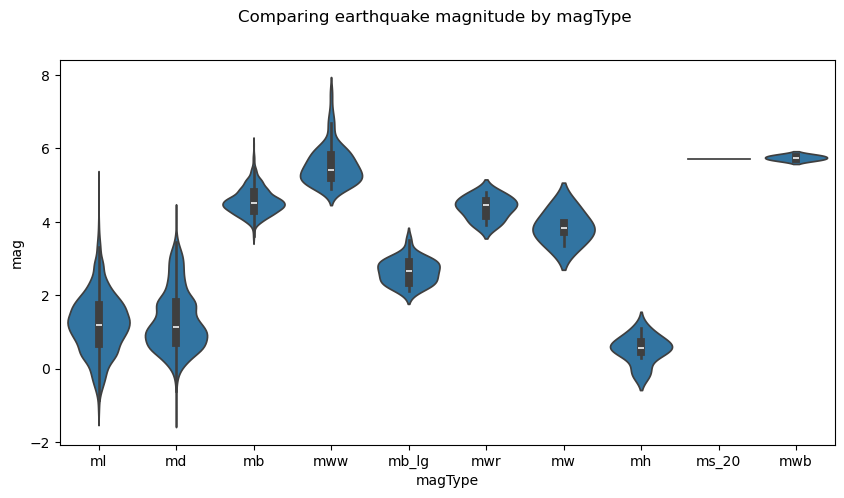

In [25]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.violinplot( # Violin plot combine box plots and KDEs
    x='magType', y='mag', data=quakes[['magType', 'mag']],
    ax=axes, density_norm='width' # all violins have same width
                        # Scale parameter has been renamed,
                        # Using the argument 'density_norm' to produce the same effect.
)
plt.suptitle('Comparing earthquake magnitude by magType')

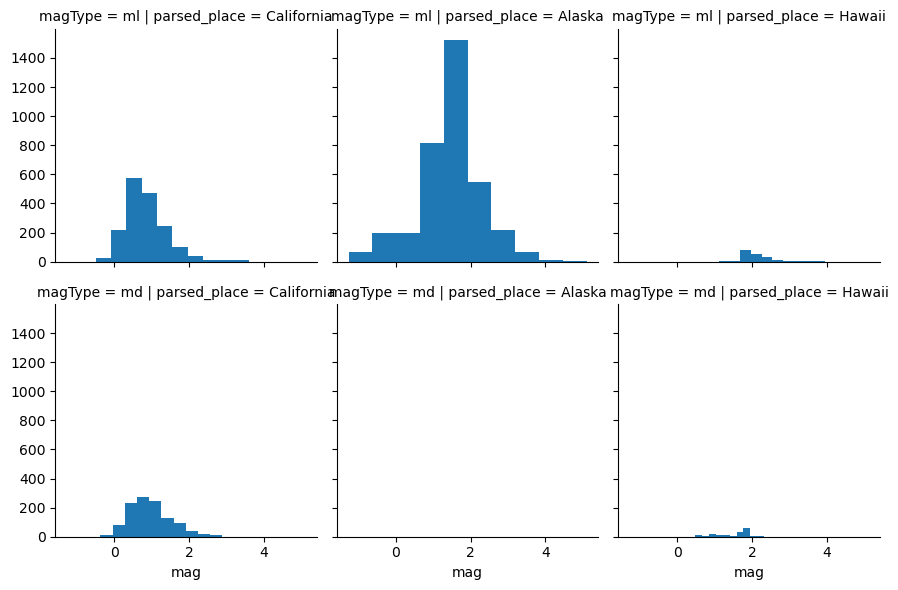

In [26]:
g = sns.FacetGrid( # Creating subplots across subsets of data
    quakes[ # the function FacetGrid specifies hotw to layout the plots
        (quakes.parsed_place.isin([ # Boolean functions that filter out specific magType and places.
            'California', 'Alaska', 'Hawaii'
        ]))
        & (quakes.magType.isin(['ml', 'md']))
    ],
    row='magType', # The row and col arguments show which categorical data goes along the rows and columns.
    col='parsed_place'
)
g = g.map(plt.hist, 'mag') # The map() function from the FacetGrid function is used to pass the plotting function.

- 9.5 Formatting Plots

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

fb = pd.read_csv(
    'C:/Users/paala/CPE311 - Paala/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

Text(0, 0.5, 'price ($)')

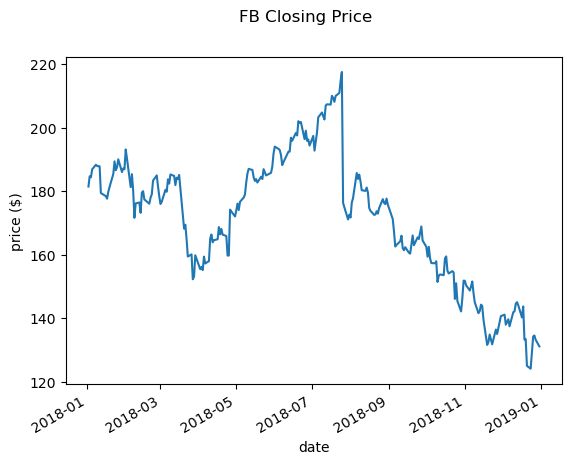

In [29]:
fb.close.plot()
plt.suptitle('FB Closing Price') # Adds title to plots and subplots
plt.xlabel('date') # Labels x-axis
plt.ylabel('price ($)') # labels y-axis

Text(0, 0.5, 'price ($)')

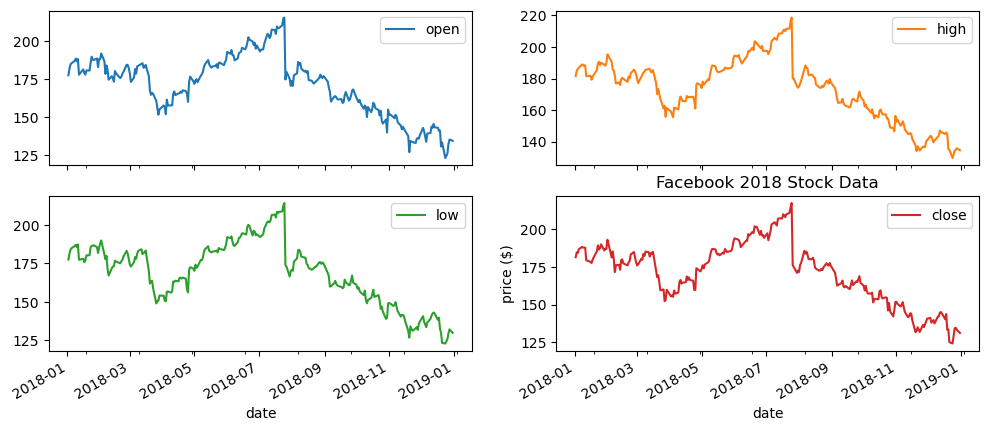

In [30]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data') # Using the title() function only adds a title to a single plot.
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

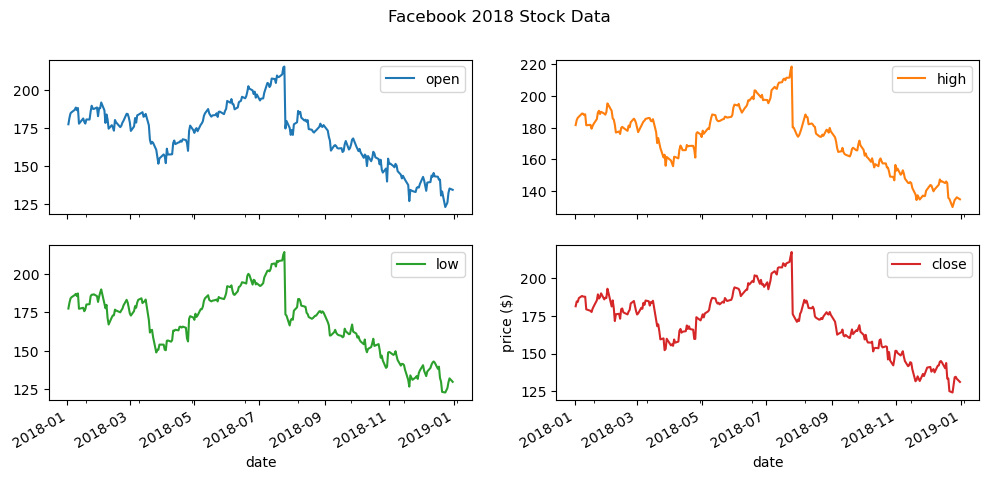

In [31]:
fb.iloc[:,:4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data') # This is why it is generally advised to use suptitle() for less confusion on the visualization.
plt.xlabel('date')
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

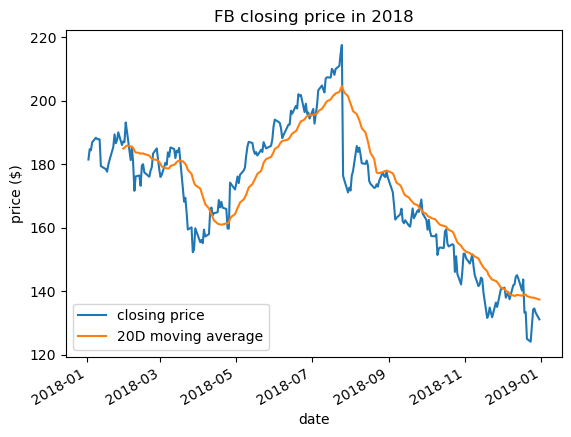

In [32]:
fb.assign(
    ma=lambda x: x.close.rolling(20).mean()
).plot(
    y=['close', 'ma'],
    title='FB closing price in 2018',
    label=['closing price', '20D moving average']
)
plt.legend(loc='lower left') # LEGEND!!!!!!!!!!!! The legend() function adds a legend to the plot.
                            # using the 'loc' argument, we can specify where to place the legends.
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

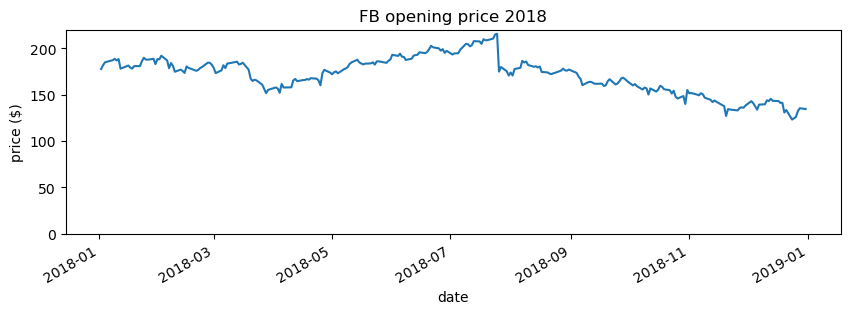

In [33]:
fb.open.plot(figsize=(10, 3), title='FB opening price 2018')
plt.ylim(0, None) # xlim() and ylim() are used to specify minimum and maximum values for the respective axes.
                  # Passing None will have matplotlib determine the limit.
plt.ylabel('price ($)')

Text(0, 0.5, 'price ($)')

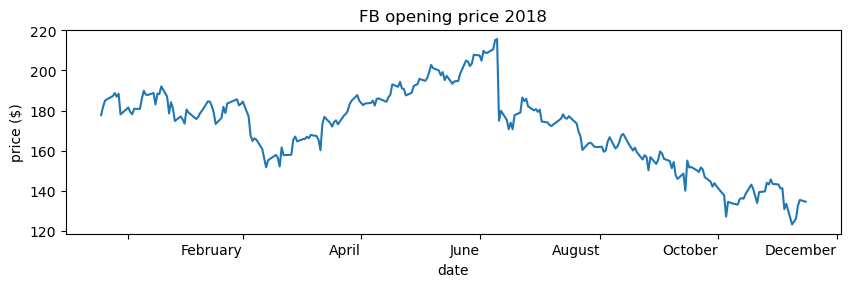

In [34]:
import calendar
fb.open.plot(figsize=(10, 3), rot=0, title='FB opening price 2018')
locs, labels = plt.xticks() # xticks() and yticks() are used to provide tick labels and specify which ticks to show.
plt.xticks(locs + 15 , calendar.month_name[::2]) # Every other month
plt.ylabel('price ($)')

Text(0, 0.5, 'percent of highest price ($218.62)')

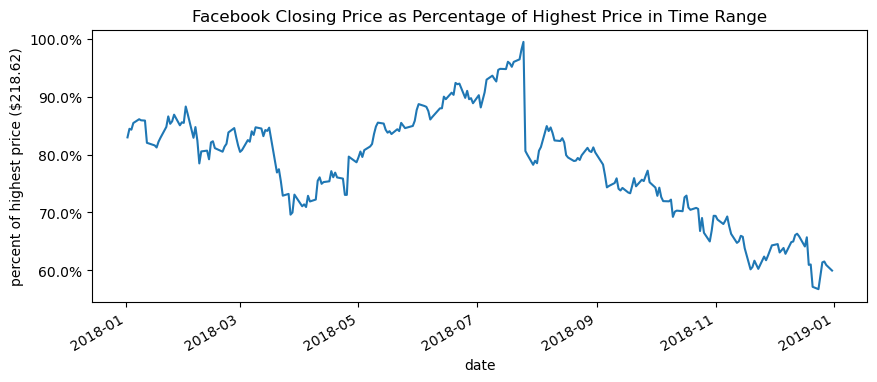

In [35]:
import matplotlib.ticker as ticker

ax = fb.close.plot(
    figsize=(10, 4),
    title='Facebook Closing Price as Percentage of Highest Price in Time Range'
)

ax.yaxis.set_major_formatter(
    ticker.PercentFormatter(xmax=fb.high.max()) # PercentFormatter specifies the denominator to use when calculating percentages.
)

ax.set_yticks([
    fb.high.max()*pct for pct in np.linspace(0.6, 1, num=5)
]) # show round percentages only (60%, 80%, etc.)
ax.set_ylabel(f'percent of highest price (${fb.high.max()})')

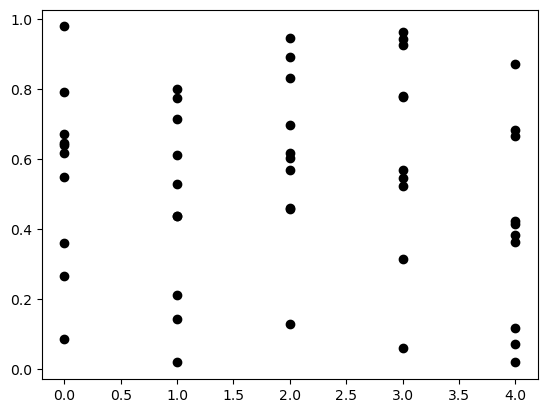

In [36]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0) 
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
# This data is prepared for the MultipleLocator function.

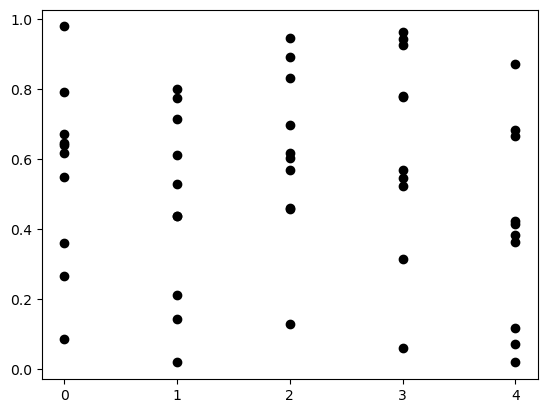

In [37]:
fig, ax = plt.subplots(1, 1)
np.random.seed(0)
ax.plot(np.tile(np.arange(0, 5), 10), np.random.rand(50), 'ko')
ax.get_xaxis().set_major_locator(
    ticker.MultipleLocator(base=1) # The parameter from the base argument gives ticks for all multiples of a number.
    # base=1 shows integer values.
)


- 9.6 Customizing Visualizations

# The presentation provided in this module is incorrect.

# Data Analysis:

- Provide comments on output from the procedures.

# Supplementary Activity:

- Using the CSV files provided and what we have learned so far in this module complete the following exercises:

1. Using seaborn, create a heatmap to visualize the correlation coefficients between earthquake magnitude and whether there was a tsunami with the magType of mb.

Text(0.5, 0.98, 'Heatmap of Earthquake Magnitude and Tsunamis with mb magTypes')

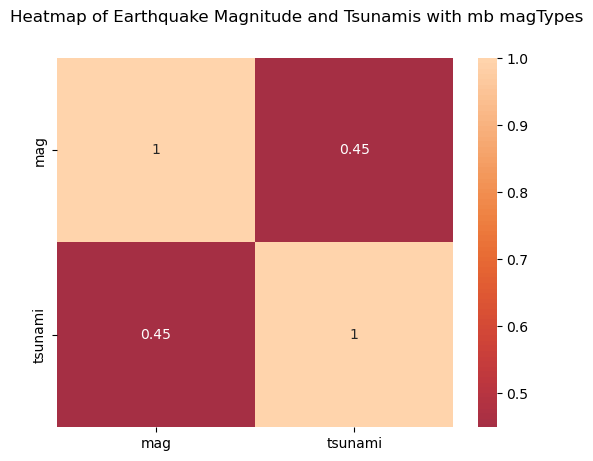

In [212]:
eq = pd.read_csv('C:/Users/paala/CPE311 - Paala/earthquakes.csv')
tsunami_mb = eq.query("magType == 'mb'") # first, we 
sns.heatmap(
    tsunami_mb[['mag', 'tsunami']].sort_index().corr(),
    annot=True, center=0
)
plt.suptitle('Heatmap of Earthquake Magnitude and Tsunamis with mb magTypes')

2. Create a box plot of Facebook volume traded and closing prices, and draw reference lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR. Be sure to use the quantile() method on the data to make this easier. (Pick whichever orientation you prefer for the plot, but make sure to use subplots.)

Text(0.5, 1.0, 'Facebook Volume Traded')

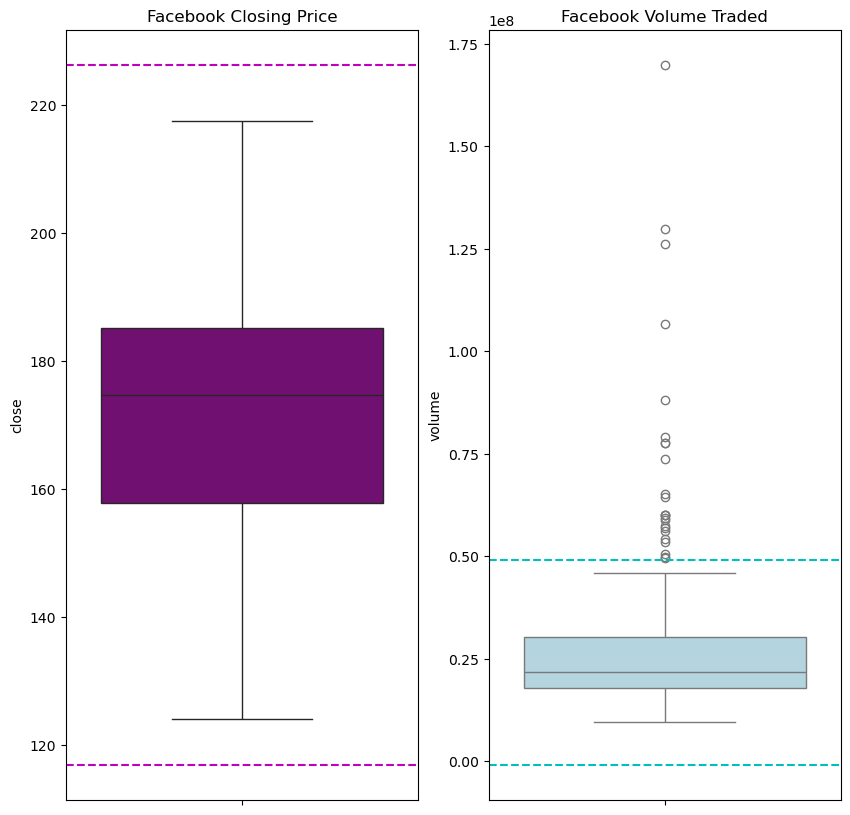

In [127]:
figs, axes = plt.subplots(1, 2, figsize=(10,10))

# For Close's Tukey fence
iqr_close = fb['close'].quantile(0.75) - fb['close'].quantile(0.25)
lower_close = fb['close'].quantile(0.25) - 1.5 * iqr_close
upper_close = fb['close'].quantile(0.75) + 1.5 * iqr_close

# For Volume's Tukey fence
iqr_volume = fb['volume'].quantile(0.75) - fb['volume'].quantile(0.25)
lower_volume = fb['volume'].quantile(0.25) - 1.5 * iqr_volume
upper_volume = fb['volume'].quantile(0.75) + 1.5 * iqr_volume

# Creating box plots for each subplot.
# The boxplot for Closing Prices
sns.boxplot(
    y='close',
    data=fb,
    ax=axes[0],
    color='purple'
)
axes[0].axhline(lower_close, linestyle='--', color='m') # Adding the horizontal reference lines
axes[0].axhline(upper_close, linestyle='--', color='m')
axes[0].set_title('Facebook Closing Price')

# The boxplot for Volume Traded
sns.boxplot(
    y='volume',
    data=fb,
    ax=axes[1],
    color='lightblue'
)
axes[1].axhline(lower_volume, linestyle='--', color='c') # Adding the horizontal reference lines
axes[1].axhline(upper_volume, linestyle='--', color='c')
axes[1].set_title('Facebook Volume Traded')

3. Fill in the area between the bounds in the plot from exercise #2.

Text(0.5, 1.0, 'Facebook Volume Traded')

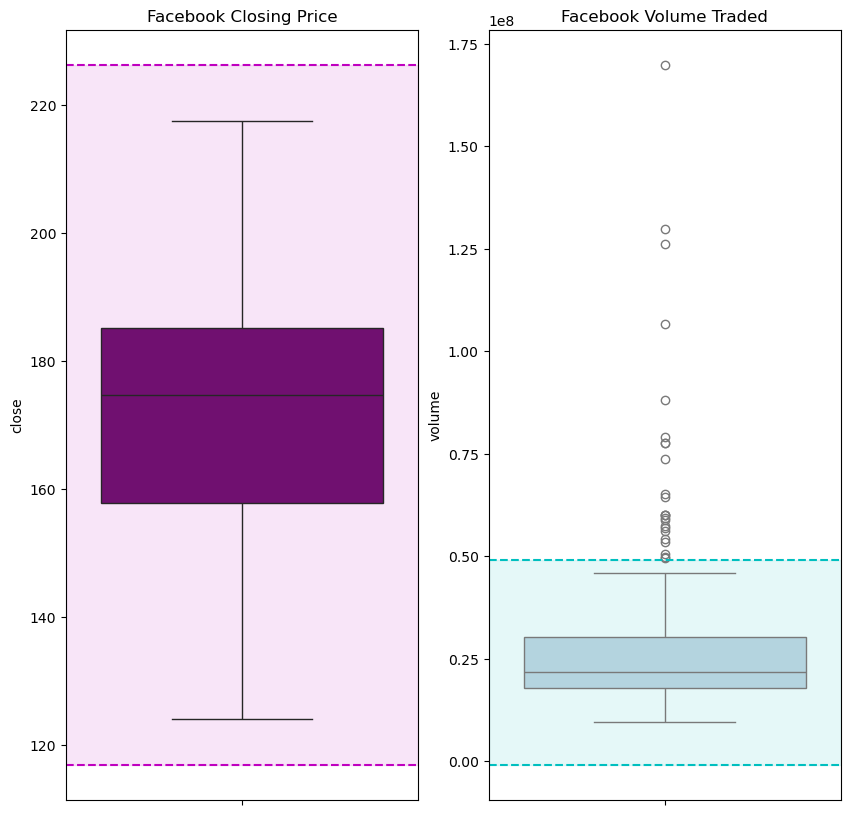

In [157]:
figs, axes = plt.subplots(1, 2, figsize=(10,10))

# For Close's Tukey fence
iqr_close = fb['close'].quantile(0.75) - fb['close'].quantile(0.25)
lower_close = fb['close'].quantile(0.25) - 1.5 * iqr_close
upper_close = fb['close'].quantile(0.75) + 1.5 * iqr_close

# For Volume's Tukey fence
iqr_volume = fb['volume'].quantile(0.75) - fb['volume'].quantile(0.25)
lower_volume = fb['volume'].quantile(0.25) - 1.5 * iqr_volume
upper_volume = fb['volume'].quantile(0.75) + 1.5 * iqr_volume

# Creating box plots for each subplot.
# The boxplot for Closing Prices
sns.boxplot(
    y='close',
    data=fb,
    ax=axes[0],
    color='purple'
)
axes[0].axhline(lower_close, linestyle='--', color='m') # Adding the horizontal reference lines
axes[0].axhline(upper_close, linestyle='--', color='m')
axes[0].axhspan(upper_close, lower_close, color='m', alpha=0.1)  # By using the axhspan() function, we are creating a horizontal rectangular that spans between from the lower bound and upper bound.
axes[0].set_title('Facebook Closing Price')

# The boxplot for Volume Traded
sns.boxplot(
    y='volume',
    data=fb,
    ax=axes[1],
    color='lightblue',
    fill=True
)
axes[1].axhline(lower_volume, linestyle='--', color='c') # Adding the horizontal reference lines
axes[1].axhline(upper_volume, linestyle='--', color='c')
axes[1].axhspan(upper_volume, lower_volume, color='c', alpha=0.1) # By using the axhspan() function, we are creating a horizontal rectangular that spans between from the lower bound and upper bound.
axes[1].set_title('Facebook Volume Traded')

4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31', which marks the large decline in Facebook price on a line plot of the closing price.


Text(0.5, 0.98, 'Line Plot of the Closing Price of Facebook')

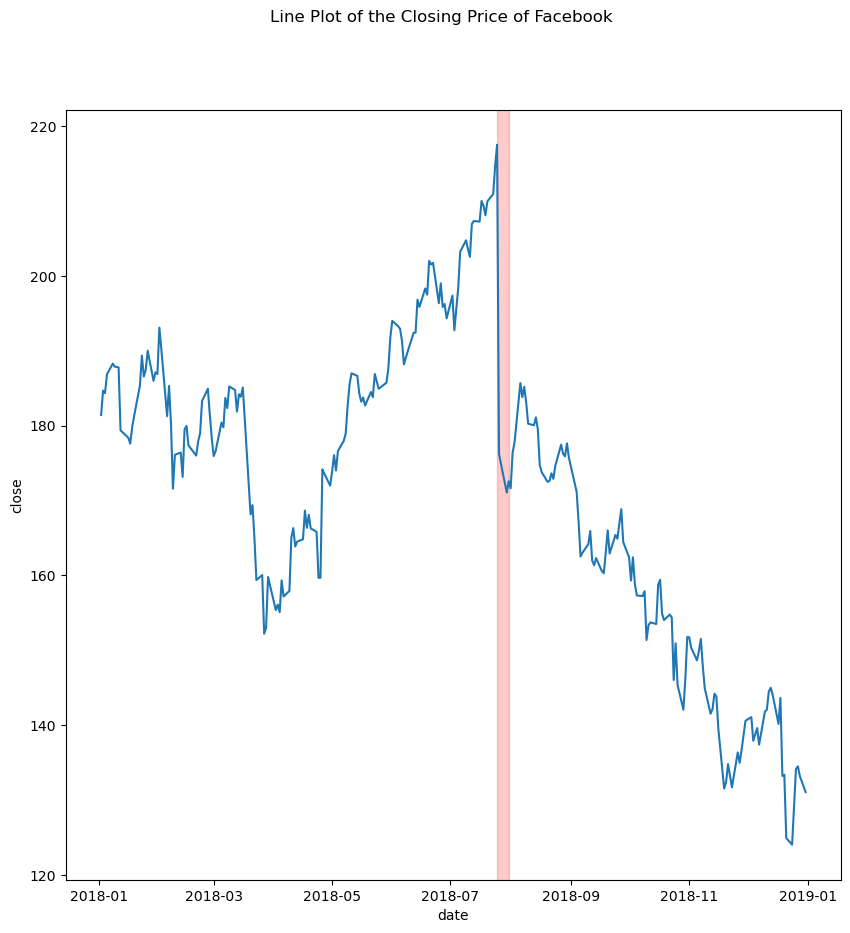

In [218]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
sns.lineplot(
    x=fb.index,
    y='close',
    data=fb
)
ax.axvspan(pd.Timestamp('2018-07-25'), # To select the range between time,
           pd.Timestamp('2018-07-31'), # I used the timestamp() function.
           color='r',
           alpha=0.2)
plt.suptitle('Line Plot of the Closing Price of Facebook')

5. Using the Facebook stock price data, annotate the following three events on a line plot of the closing price:
- Disappointing user growth announced after close on July 25, 2018
- Cambridge Analytica story breaks on March 19, 2018 (when it affected the market)
- FTC launches investigation on March 20, 2018

Text(0.5, 0.98, 'Facebook Closing Prices')

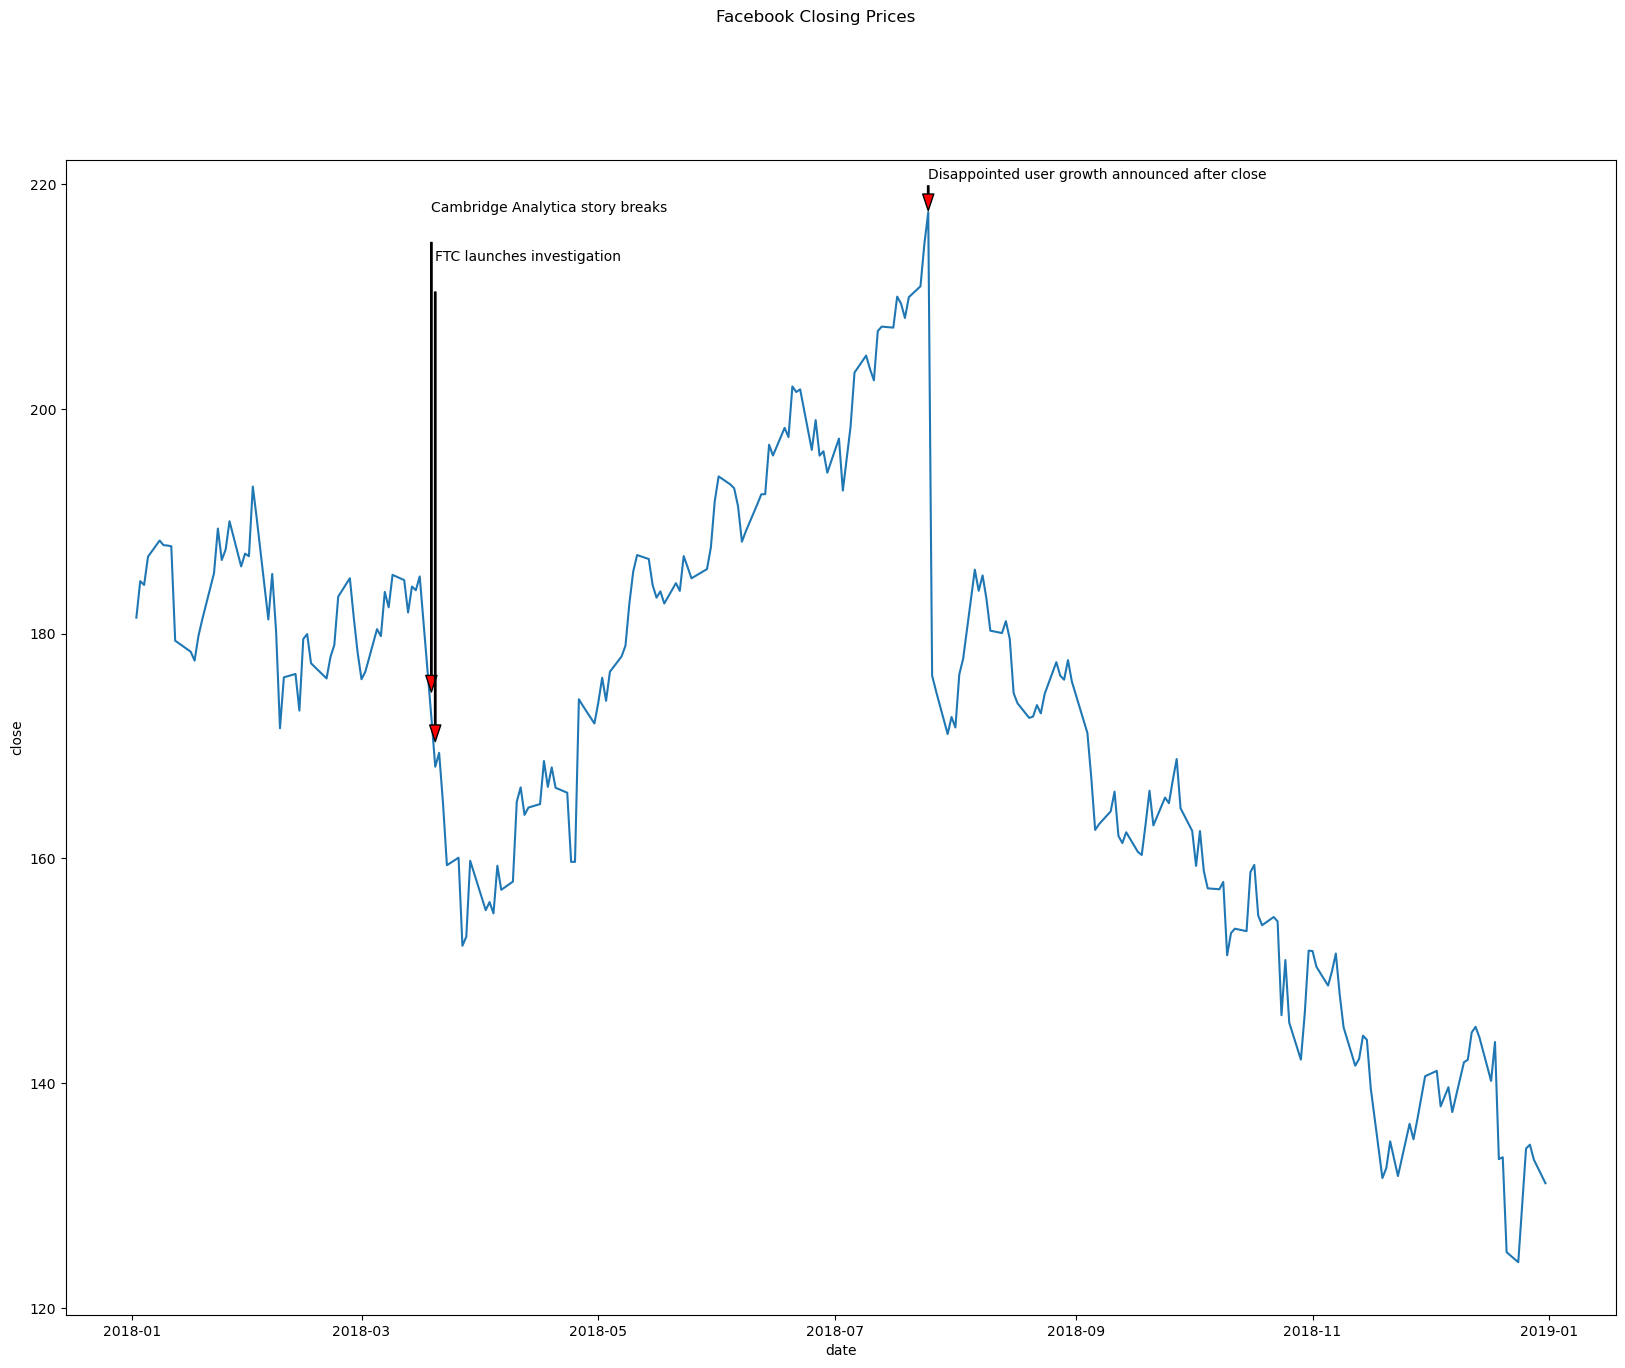

In [349]:
fig, ax = plt.subplots(1, 1, figsize=(20,15))
sns.lineplot(
    x=fb.index,
    y='close',
    data=fb
)
ax.annotate(
    'Disappointed user growth announced after close',
    xy=(pd.Timestamp('2018-07-25'), fb.loc['2018-07-25', 'close']),
    xytext = (pd.Timestamp('2018-07-25'), fb.loc['2018-07-25', 'close']+ 3),
    arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=8)
)
ax.annotate(
    'Cambridge Analytica story breaks',
    xy=(pd.Timestamp('2018-03-19'), fb.loc['2018-03-19', 'close']),
    xytext = (pd.Timestamp('2018-03-19'), fb.loc['2018-03-19', 'close'] + 45),
    arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=8)
)
ax.annotate(
    'FTC launches investigation',
    xy=(pd.Timestamp('2018-03-20'), fb.loc['2018-03-20', 'close']),
    xytext = (pd.Timestamp('2018-03-20'), fb.loc['2018-03-20', 'close'] + 45),
    arrowprops=dict(facecolor='red', shrink=0.05, width=1, headwidth=8)
)
# The annotate function helps you annotate different points in the plot.
# Optionally, you can add an arrow for more clarity.

plt.suptitle('Facebook Closing Prices')

6. Modify the reg_resid_plots() function to use a matplotlib colormap instead of cycling between two colors. Remember, for this use case, we should pick a qualitative colormap or make our own.

In [440]:
import itertools

import matplotlib.pyplot as plt
import seaborn as sns

def reg_resid_plots(data):
    """
    Using seaborn, plot the regression and residuals
    plots side-by-side for every permutation of 2 columns 
    in the data.
    
    Parameters:
        - data: A pandas DataFrame

    Returns:
        A matplotlib Figure object.
    """
    num_cols = data.shape[1]
    permutation_count = num_cols * (num_cols - 1)
    
    fig, ax = plt.subplots(permutation_count, 2, figsize=(15, 8))
    color_cycle = itertools.cycle(sns.color_palette("Pastel1")) # First, we must save the cycle of colors on a qualitative colormap into a variable..
    for (x, y), axes in zip(
        itertools.permutations(data.columns, 2), 
        ax
        # itertools.cycle(sns.color_palette("Paired")) 
        # Here, we removed the cycle since it is already in a variable and it won't work because it will result in a tuple object.
    ):
        # However, what we could do is to create another variable where we'll use the iterated cycle so that it would pass into the color() argument.
        color = next(color_cycle)
        for subplot, func in zip(axes, (sns.regplot, sns.residplot)):
            func(x=x, y=y, data=data, ax=subplot, color=color) # Then use the variable itself as a parameter to the color() argument, for which every iteration, the next color in the colormap will be used in the next plot.
    plt.close()
    return fig

In [442]:
# In order to test this out, let's try to recreate the plot back in the 9.4 procedure.

In [444]:
fb_reg_data = fb.assign(
    volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).iloc[:,-2:] # Isolating the data by saving it into a variable before visualization

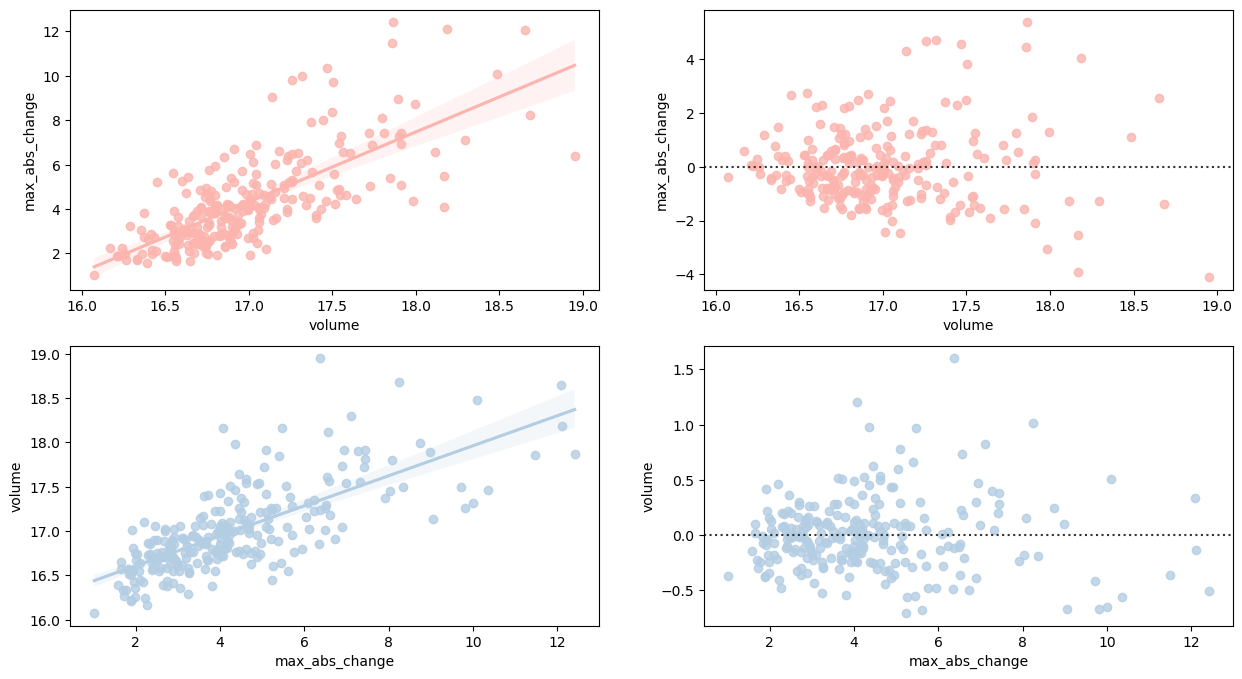

In [450]:
reg_resid_plots(fb_reg_data) # Now, if there are many more subplots to use, it would iterate to the other colors in the given qualitative colormap.

# Summary/Conclusion:

- Provide a summary of your learnings and the conclusion for this activity.

*In summary, I have learned complex functions and arguments that can be used in the seaborn libraries. There are also many plots to choose from the seaborn library. I'd like to think that Seaborn is the little brother of the Matplotlib library, as matplotlib's functionality works in tandem with seaborn's functionality. However, there are more features in seaborn than in matplotlib. For example, I found out that it is possible to count the frequency distribution of data using the countplot() function in seaborn.* <br>

*Not only that, but I have also learned that it is possible to have two plots in a plot at the same time. The main plot is shown, and on its sides are frequency distributions of specified data of the plot. I have also learned the essence of itertools in creating plots. It is a library where it turns many objects into iterators. It can be helpful in creating many plots and subplots. Funnily, I also learned the habit to use the suptitle() function for visualizing data. It is important as to not cause confusion in visualizing data.* <br>

*Overall, the activity itself was fun, because we get to learn seaborn and itertools libraries' functions, though I can say that I haven't really quite understood how itertools work. I think I would be needing more practice.*
*Apologies for passing the activity this late, sir!*